In [1]:
#!pip install tweepy


In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
auth = tweepy.OAuthHandler("7YWwchZ5FJSaSkUqGh1dcqRPd", "sMIrTG99VAu7IhpIE6GeNxAfVZrGJgUyv9QOr7lGzTvHUvV2Fv")
auth.set_access_token("1155160241358721024-M0Ps3SBjKSjMHjK5SJDbddxQsDMaao", "KguQcFIY4ESvTo285izomSI2eOpfuNJUKEpmO3Mni0F8r")
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
tweets = api.search(q="shawacademy",count=100,lang="en",since="2020-11-01")
for item in tweets:
    print(item.text)

Literally being hounded by @shawacademy EVERY DAY this week on SMS and with automated calls. Please stop. 🛑
RT @ta_aziyya: This Page is a Scam. 
Please Retweet!!!

They need to refund @NaijaSavvy
@JadeBeddington @SaHorrors @shaw_support @shawacademy @PayPal Just sent email to cancel and ask to get all your info deleted.
@shawacademy Keep deleting my comments they will come back. This company is a SCAM. Money taken of your bank accoun… https://t.co/u4FOvv9WzQ
This Page is a Scam. 
Please Retweet!!!

They need to refund @NaijaSavvy https://t.co/FfKjQNoG9j
RT @padrageous: If anyone is thinking about doing a 'free month trial' course with @shawacademy, don't. They are Grade A, weapons-grade, co…
RT @mandisa_gwala_: RT for awareness! ⚠️ Don’t subscribe to Shaw Academy free trials/classes. You WILL NOT be able to cancel your subscript…
RT @SaHorrors: @iam_jnews @Emilyshaw222 @shawacademy A cancelled #shawacademy account means nothing. They will still steal your money unles…
RT @SaHorrors: @w

In [5]:
df =pd.DataFrame([item.text for item in tweets], columns=['Tweets'])


In [6]:
#cleaning the data
def cleanTxt(text):
    text = re.sub(r'@[A-za-z0-9]+', '', text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?\/\/\S+', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,Literally being hounded by EVERY DAY this wee...
1,: This Page is a Scam. \nPlease Retweet!!!\n\n...
2,Just sent email to cancel and ask to get ...
3,Keep deleting my comments they will come back...
4,This Page is a Scam. \nPlease Retweet!!!\n\nTh...
...,...
95,Could you please DM us the email address li...
96,Shaw Academy is a Scam. ShawAcademy ShawAcade...
97,they are also the plug and
98,: Beware! A cancelled shawacademy account me...


In [7]:
#Sujectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#Add subjectivity and poloarity to data frame 
df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] =df['Tweets'].apply(getpolarity)
df

,Tweets,Subjectivity,Polarity
0,Literally being hounded by EVERY DAY this wee...,0.0,0.0
1,: This Page is a Scam. \nPlease Retweet!!!\n\n...,0.0,0.0
2,Just sent email to cancel and ask to get ...,0.0,0.0
3,Keep deleting my comments they will come back...,0.0,0.0
4,This Page is a Scam. \nPlease Retweet!!!\n\nTh...,0.0,0.0
...,...,...,...
95,Could you please DM us the email address li...,0.0,0.0
96,Shaw Academy is a Scam. ShawAcademy ShawAcade...,0.5,0.5
97,they are also the plug and,0.0,0.0
98,: Beware! A cancelled shawacademy account me...,0.0,0.0


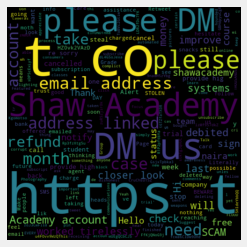

In [8]:
#Plotting WordCloud 
allwords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=500, random_state =21, max_font_size=200).generate(allwords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [9]:
#Positive, Negative, Neutral 
def getAnalysis(points):
    if points < 0:
        return 'Negative'
    elif points == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
#Add analysis to the dataframe 
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Literally being hounded by EVERY DAY this wee...,0.0,0.0,Neutral
1,: This Page is a Scam. \nPlease Retweet!!!\n\n...,0.0,0.0,Neutral
2,Just sent email to cancel and ask to get ...,0.0,0.0,Neutral
3,Keep deleting my comments they will come back...,0.0,0.0,Neutral
4,This Page is a Scam. \nPlease Retweet!!!\n\nTh...,0.0,0.0,Neutral
...,...,...,...,...
95,Could you please DM us the email address li...,0.0,0.0,Neutral
96,Shaw Academy is a Scam. ShawAcademy ShawAcade...,0.5,0.5,Positive
97,they are also the plug and,0.0,0.0,Neutral
98,: Beware! A cancelled shawacademy account me...,0.0,0.0,Neutral


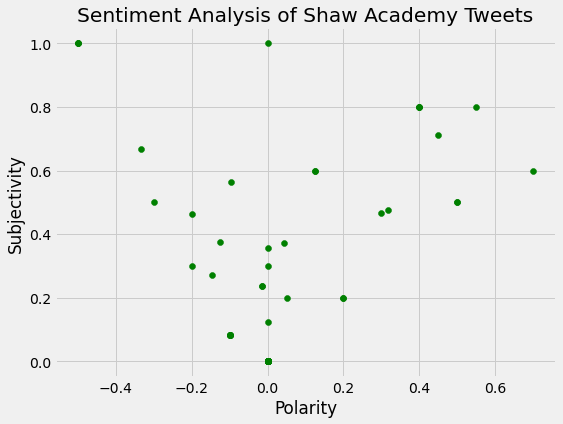

In [10]:
#Plot polarity against subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green')
    
plt.title('Sentiment Analysis of Shaw Academy Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [11]:
#percentage of positive tweets 
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

16.0

In [12]:
#percentage of negative tweets 
ngtweets = df[df.Analysis == 'Negative']
ngtweets = ngtweets['Tweets']

round((ngtweets.shape[0] / df.shape[0]) * 100, 1)

19.0

In [13]:
#percentage of neutral tweets 
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

65.0

In [14]:
df['Analysis'].value_counts()

Neutral     65
Negative    19
Positive    16
Name: Analysis, dtype: int64

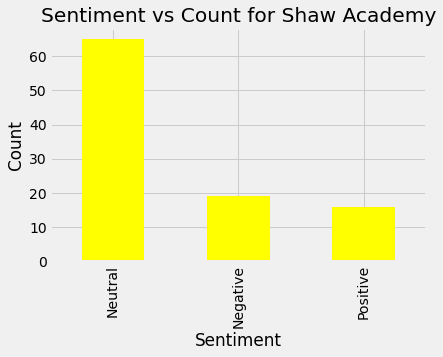

In [15]:
#Plotting the counts 
plt.title('Sentiment vs Count for Shaw Academy')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar', color='Yellow')
plt.show()

In [16]:
df.to_csv(r'Shaw Academy Tweets.csv', index=False)